# Customer Segmentation :

Customer Segmentation is the process of dividing a company's customer base into distinct groups based on certain characteristics, behaviors, or demographics. This strategic approach enables businesses to better understand their diverse customer needs, preferences, and behaviors.

# Importance to Business:

1. Personalized Marketing: Segmentation allows businesses to tailor marketing strategies to specific customer groups, ensuring that messages resonate more effectively.

2. Improved Customer Experience: By understanding the unique needs of different segments, businesses can enhance product offerings, customer service, and overall satisfaction.

3. Resource Optimization: Efficient allocation of resources is possible as businesses can focus on segments that are most valuable and responsive, optimizing marketing budgets and efforts.

4. Targeted Product Development: Segmentation insights aid in the creation of products or services tailored to specific customer needs, increasing the likelihood of successful launches.

5. Customer Retention: Identifying and addressing the specific needs of different customer segments can foster loyalty, reducing churn and maximizing customer lifetime value.

6. Competitive Advantage: Businesses gain a competitive edge by staying agile and responsive to market changes, outperforming rivals who use generic, one-size-fits-all approaches.

# About the dataset :
This input file contains the basic information (ID, age, gender, income, spending score) about the customers of a mall. Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

# steps 

## Data Understanding:

Explore and understand the dataset's structure, size, and variables.
Identify patterns and outliers through basic exploration and EDA.

## Data Preparation:

Handle missing values, outliers, and standardize or normalize features.
Select relevant features for meaningful clustering.

## Model Selection and Training:

Choose a suitable clustering algorithm (e.g., K-means, Hierarchical).
Train the model and determine the optimal number of clusters.

## Interpretation and Visualization:

Interpret cluster characteristics and relate findings to business goals.
Visualize clusters to communicate insights effectively.

In [1]:
# importing library 
import pandas as pd 
import numpy as np 

In [2]:
# loading data set 
df = pd.read_csv('Mall_Customers.csv')

## Basic exploration 

In [3]:
# first 5 rows 
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# last 5 row 
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
# number of row and column in data set 
print(f'number of rows : {df.shape[0]}')
print(f'number of columns : {df.shape[1]}')

number of rows : 200
number of columns : 5


In [6]:
# for basic overview of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


note : no error in case of data type of feature as well no null values in data set 

In [7]:
# for basic summary of dataset
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


some outliers in Annual Income  which is natural 

In [8]:
# checking null values 
df.isnull().any()

CustomerID                False
Genre                     False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [9]:
# checking duplicates 
df.duplicated().any()

False

note : no duplicates as well no null values 

In [10]:
df.nunique()

CustomerID                200
Genre                       2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

since CustomerID have all unique values we will drop it and we will change the column name as well for better readability 

In [11]:
df.drop(columns='CustomerID' , inplace=True)

In [12]:
# changing name of columns
df.columns = [i.strip() for i in df.columns]
df.rename(columns ={'Genre':'gender' , 'Annual Income (k$)' : 'Annual_Income','Spending Score (1-100)' : 'Spending_Score'},inplace=True)

In [13]:
# changing name of columns in lowercase 
df.columns = [i.lower() for i in df.columns]
df.head()

,gender,age,annual_income,spending_score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# EDA

## univariate analysis 

In [14]:
import seaborn as sns 
import matplotlib.pyplot as plt 

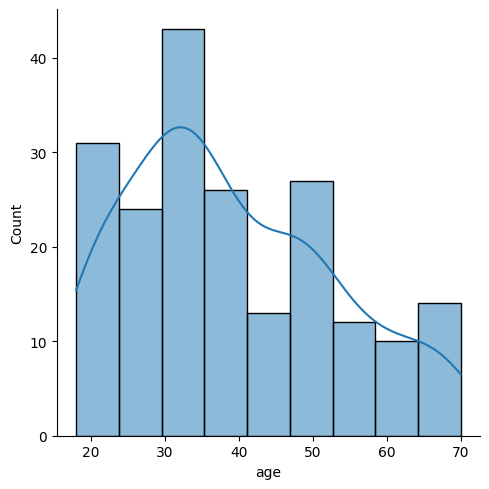

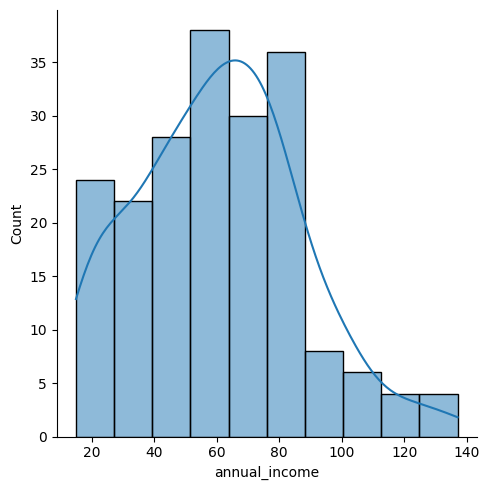

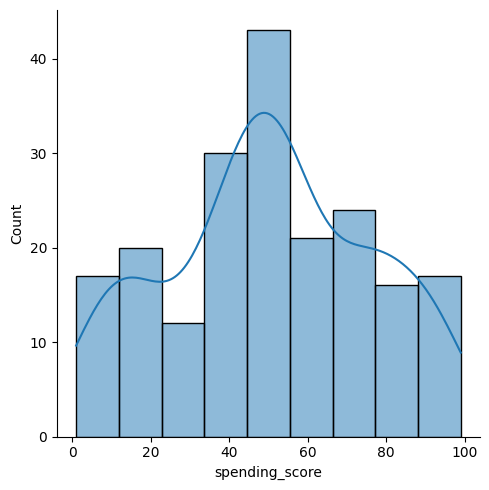

In [15]:
cols = [col for col in df.columns if df[col].dtypes != 'object']
for i in cols :
    sns.displot(x= i , data= df , kde = True )
    plt.show()

note : age , annual_income are right skewed
where spending_score seems normal 

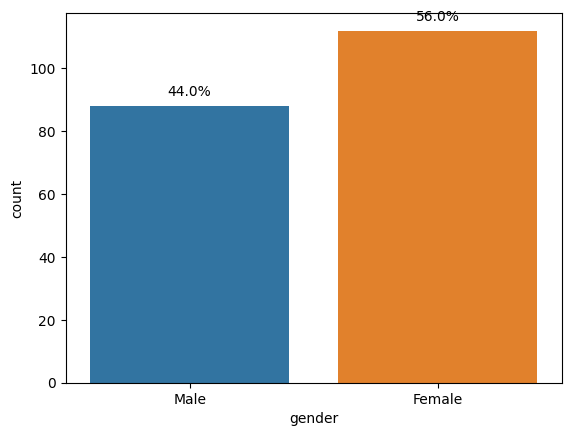

<Figure size 1600x600 with 0 Axes>

In [16]:
ax = sns.countplot(x='gender', data=df)
plt.figure(figsize=(16, 6))
# Calculate percentage values
total = len(df['gender'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.show()

note : more women are customer then men 

## bivariate analysis 

In [17]:
df.head()

,gender,age,annual_income,spending_score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


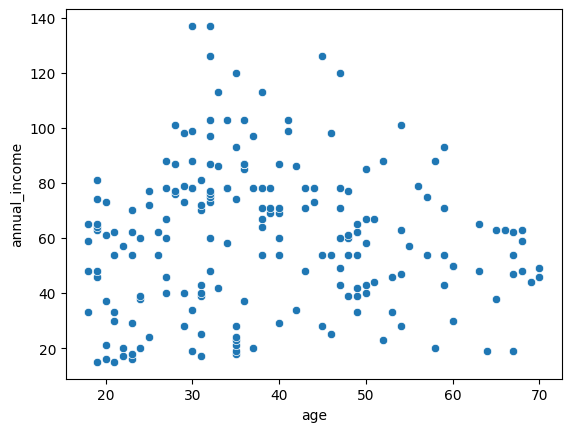

In [18]:
# numerical analysis 
sns.scatterplot(x='age' , y = 'annual_income' ,data = df )
plt.show()

note : no relation between annual_income and age  but their outliers between 30 to 50 age where people income is very high 

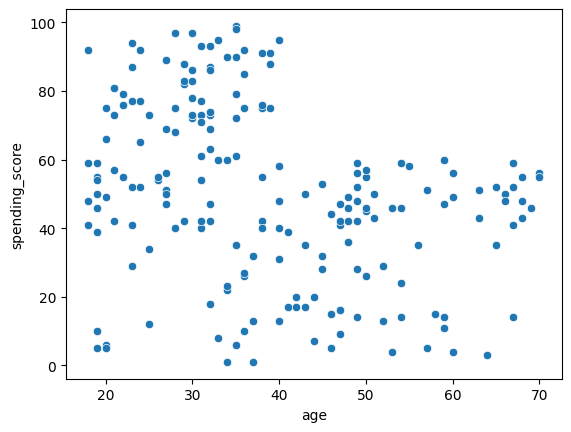

In [19]:
sns.scatterplot(x='age' , y = 'spending_score' ,data = df )
plt.show()

note : no linear realtion again but people between 20 to 40 have more spending_score it can be beacuse young people visiting frequency in mall is more then old one 

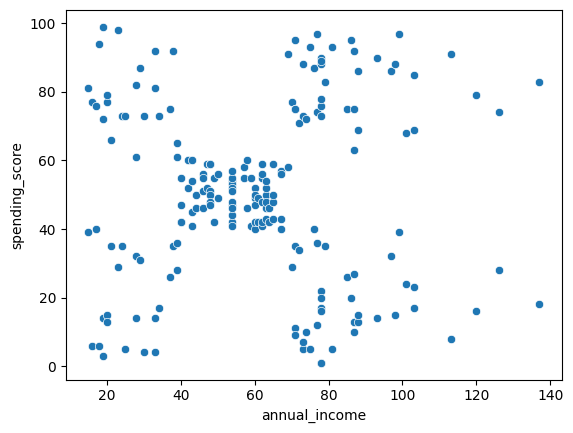

In [20]:
sns.scatterplot(x='annual_income' , y = 'spending_score' ,data = df )
plt.show()

here different age group  people behaving differnet way 

In [21]:
# both numrical and categorical 
df.head()

,gender,age,annual_income,spending_score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


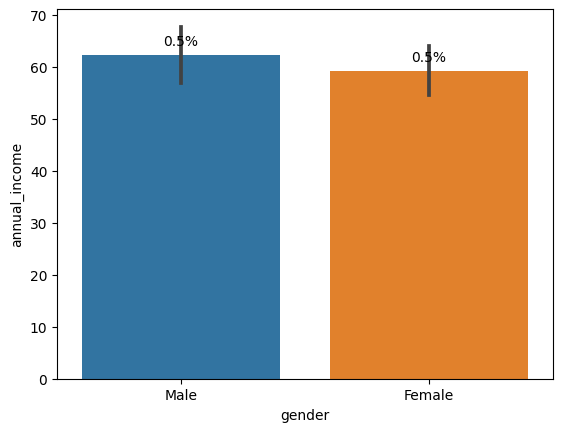

In [22]:
ax = sns.barplot(x='gender', y='annual_income', data=df)

# Calculate percentage values
total = df['annual_income'].sum()
for p in ax.patches:
    percentage = '{:.1%}'.format(p.get_height() / total)
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.show()

male annual_income is slightly more then female

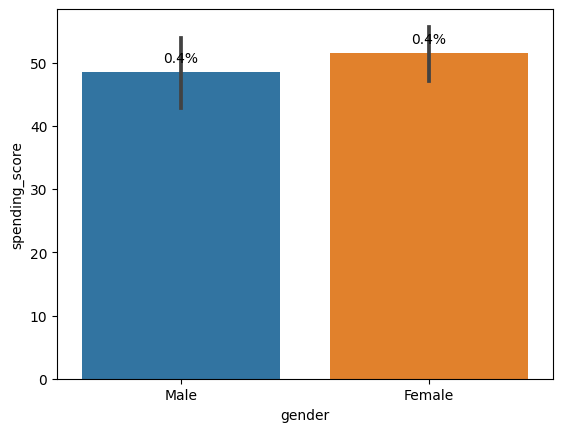

In [23]:
ax = sns.barplot(x='gender', y='spending_score', data=df)

# Calculate percentage values
total = df['annual_income'].sum()
for p in ax.patches:
    percentage = '{:.1%}'.format(p.get_height() / total)
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.show()

here female spending score is higher 

# multivariate analysis 

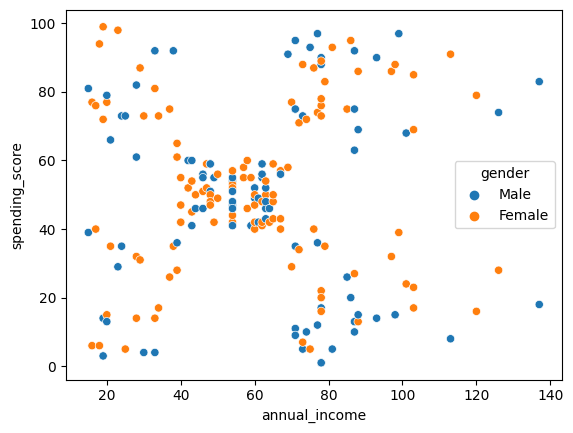

In [24]:
sns.scatterplot(x='annual_income' , y = 'spending_score' ,data = df , hue= 'gender' )
plt.show()

# Feature engineering 

## Scaling:
Scaling is a preprocessing technique used to standardize or normalize numerical features within a specific range. Common scaling methods include Min-Max Scaling (rescaling values between 0 and 1) and Standard Scaling (achieving a mean of 0 and standard deviation of 1). Scaling ensures that all features contribute equally to model training and prevents dominance by features with larger magnitudes.

## Encoding:
Encoding involves converting categorical data into a format suitable for machine learning algorithms. One-hot encoding is a common method, creating binary columns for each category. Label encoding assigns a unique numeric label to each category. Proper encoding enables algorithms to interpret and utilize categorical information effectively during model training.

## Transformation (e.g., Log Transformation):
Transformation involves altering the distribution of data, often applied to address issues like skewness. Log transformation, for example, is used to stabilize variance and make the data more symmetric. It is particularly useful when dealing with highly skewed distributions or when the data exhibits exponential growth. Transformations help meet assumptions of certain models and improve overall model performance.

In [25]:
df.head()

,gender,age,annual_income,spending_score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [26]:
df['gender'] = df['gender'].astype('category')

In [36]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [28]:
# using trformation to reduce skewness and make distribution normal 
# Log Transformation
cols = [col for col in df.columns if df[col].dtypes != 'category']
for i in cols :
    if i != 'spending_score' :
        df[i] = np.log1p(df[i])  # Using np.log1p to handle zero values

In [29]:
df.head()

,gender,age,annual_income,spending_score
0,Male,2.995732,2.772589,39
1,Male,3.091042,2.772589,81
2,Female,3.044522,2.833213,6
3,Female,3.178054,2.833213,77
4,Female,3.465736,2.890372,40


In [30]:
cols = [col for col in df.columns if df[col].dtypes != 'category']
for i in cols :
    print(f'skewness of {i} is {df[i].skew()}')

skewness of age is -0.0894906016890439
skewness of annual_income is -0.7359971613306433
skewness of spending_score is -0.047220201374263374


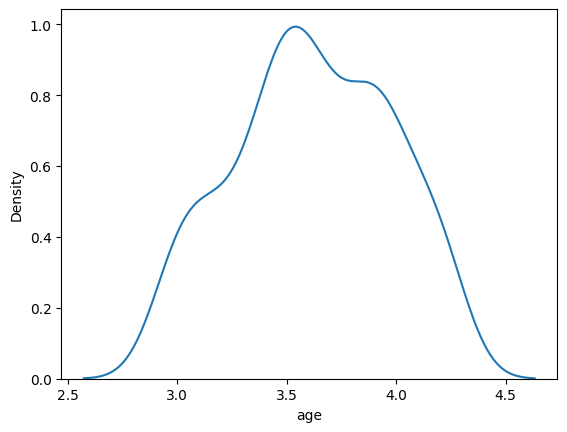

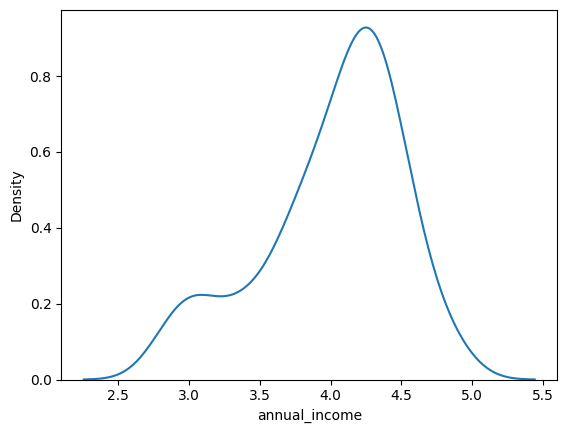

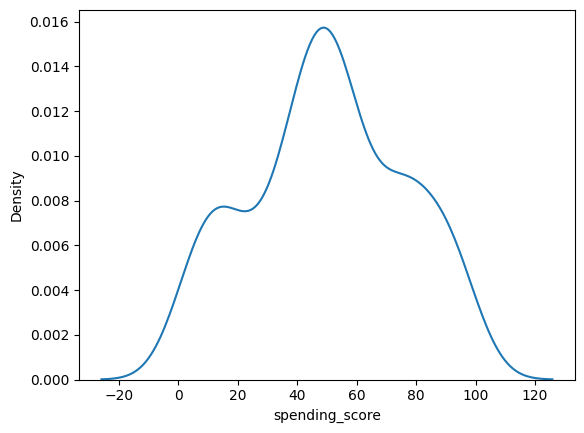

In [31]:
cols = [col for col in df.columns if df[col].dtypes != 'category']
for i in cols :
    sns.kdeplot(x = i , data = df)
    plt.show()

In [33]:
# using scaling so that all variable can be in smae scale 
scaler = StandardScaler()
cols = [col for col in df.columns if df[col].dtypes != 'category'] 
for i in cols :
    df[i] = scaler.fit_transform(df[[i]])

In [34]:
df.head()

,gender,age,annual_income,spending_score
0,Male,-1.763518,-2.510420,-0.434801
1,Male,-1.495595,-2.510420,1.195704
2,Female,-1.626366,-2.387663,-1.715913
3,Female,-1.251000,-2.387663,1.040418
4,Female,-0.442306,-2.271926,-0.395980


In [38]:
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_categories = encoder.fit_transform(df[['gender']])
encoded_df = pd.concat([df, pd.DataFrame(encoded_categories, columns=encoder.get_feature_names_out(['gender']))], axis=1)

# Drop the original 'Category' column after encoding
encoded_df.drop('gender', axis=1, inplace=True)

C:\Users\91865\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [39]:
encoded_df.head()

,age,annual_income,spending_score,gender_Male
0,-1.763518,-2.510420,-0.434801,1.0
1,-1.495595,-2.510420,1.195704,1.0
2,-1.626366,-2.387663,-1.715913,0.0
3,-1.251000,-2.387663,1.040418,0.0
4,-0.442306,-2.271926,-0.395980,0.0


#  model preparation and evaluation

## 1.KMeans

Text(0, 0.5, 'Within-Cluster Sum of Squares (WCSS)')

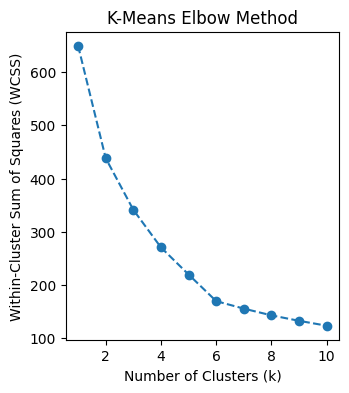

In [40]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(encoded_df)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Curve for K-Means
plt.figure(figsize=(12, 4))

# K-Means Elbow Curve
plt.subplot(1, 3, 1)
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('K-Means Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')

since at 6 their is an elbow edge so our cluster will be 6 

In [42]:
# Applying K-Means Clustering with 6 clusters
k = 6  # Set the number of clusters to 6
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Cluster'] = kmeans.fit_predict(encoded_df)

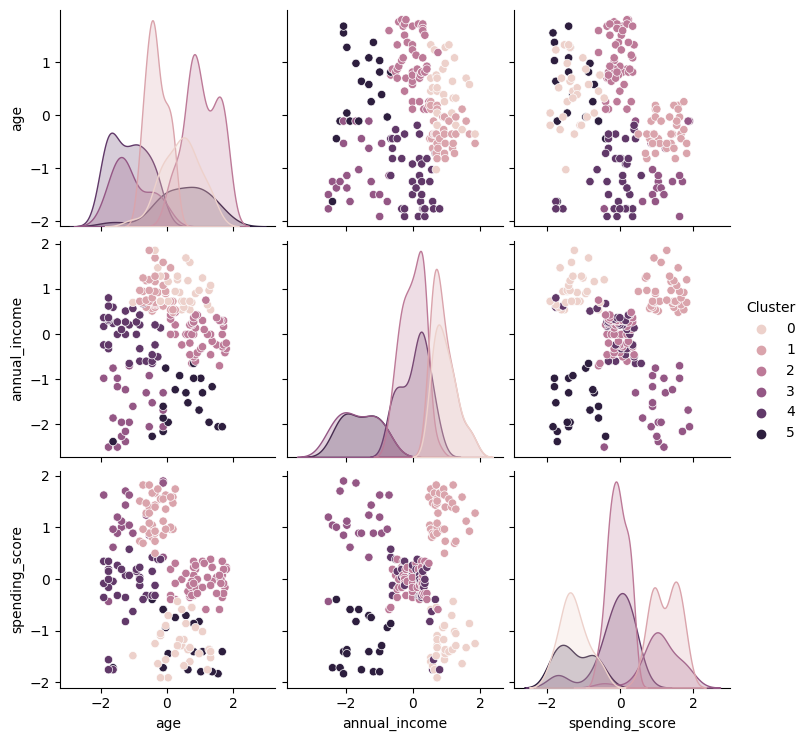

In [43]:
# Visualizing Clusters (e.g., using Pair Plots)
sns.pairplot(df, hue='Cluster')
plt.show()


In [45]:
# Evaluating Silhouette Score
silhouette_avg = silhouette_score(encoded_df, df['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.3897459560249764


#  hyper tuning of model

In [47]:
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    df['Cluster'] = kmeans.fit_predict(encoded_df)
    silhouette_avg = silhouette_score(encoded_df, df['Cluster'])
    print(f'k={k}, Silhouette Score: {silhouette_avg}')

k=2, Silhouette Score: 0.30933801459611826
k=3, Silhouette Score: 0.3131887805757442
k=4, Silhouette Score: 0.33083024975877734
k=5, Silhouette Score: 0.34851458661036216
k=6, Silhouette Score: 0.3897459560249764
k=7, Silhouette Score: 0.34938215308435683
k=8, Silhouette Score: 0.3578969456936943
k=9, Silhouette Score: 0.3558952887513949
k=10, Silhouette Score: 0.3326230466883739


silhouette Score lies bewteen -1 to 1 and our score is 0.3897 which is moderate 

## 2.AgglomerativeClustering

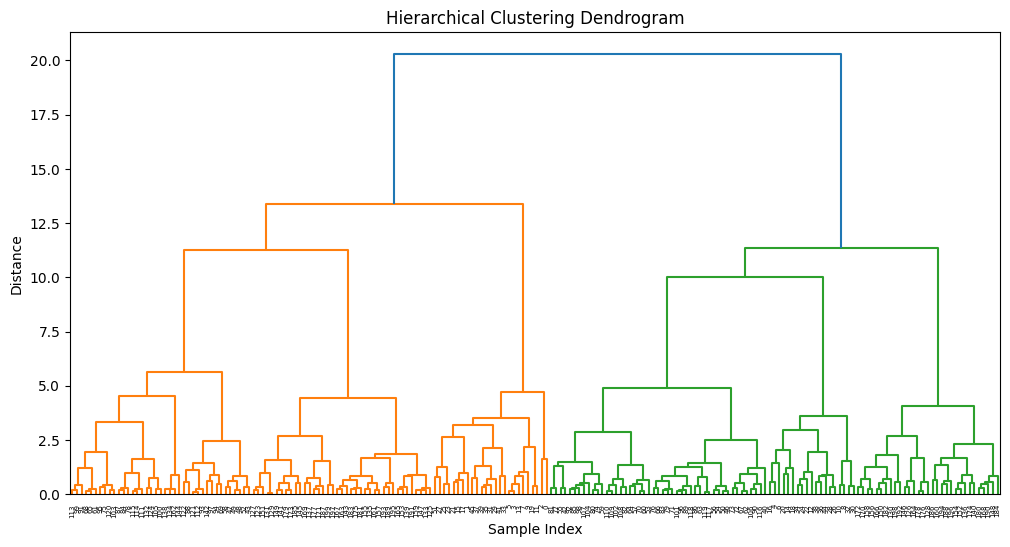

In [48]:
# for cluster 
linked = linkage(encoded_df, 'ward')

# Create and visualize the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

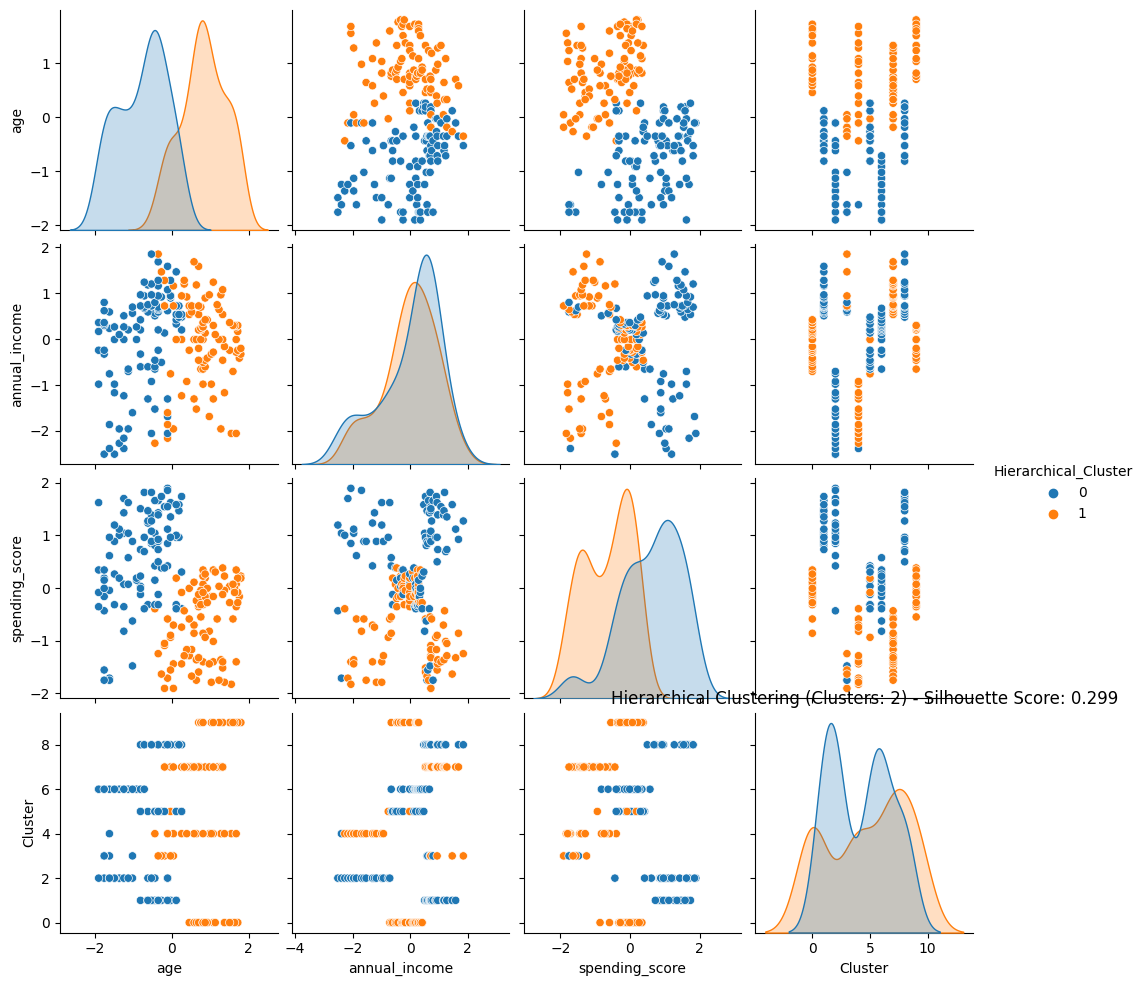

Number of Clusters: 2, Silhouette Score: 0.299


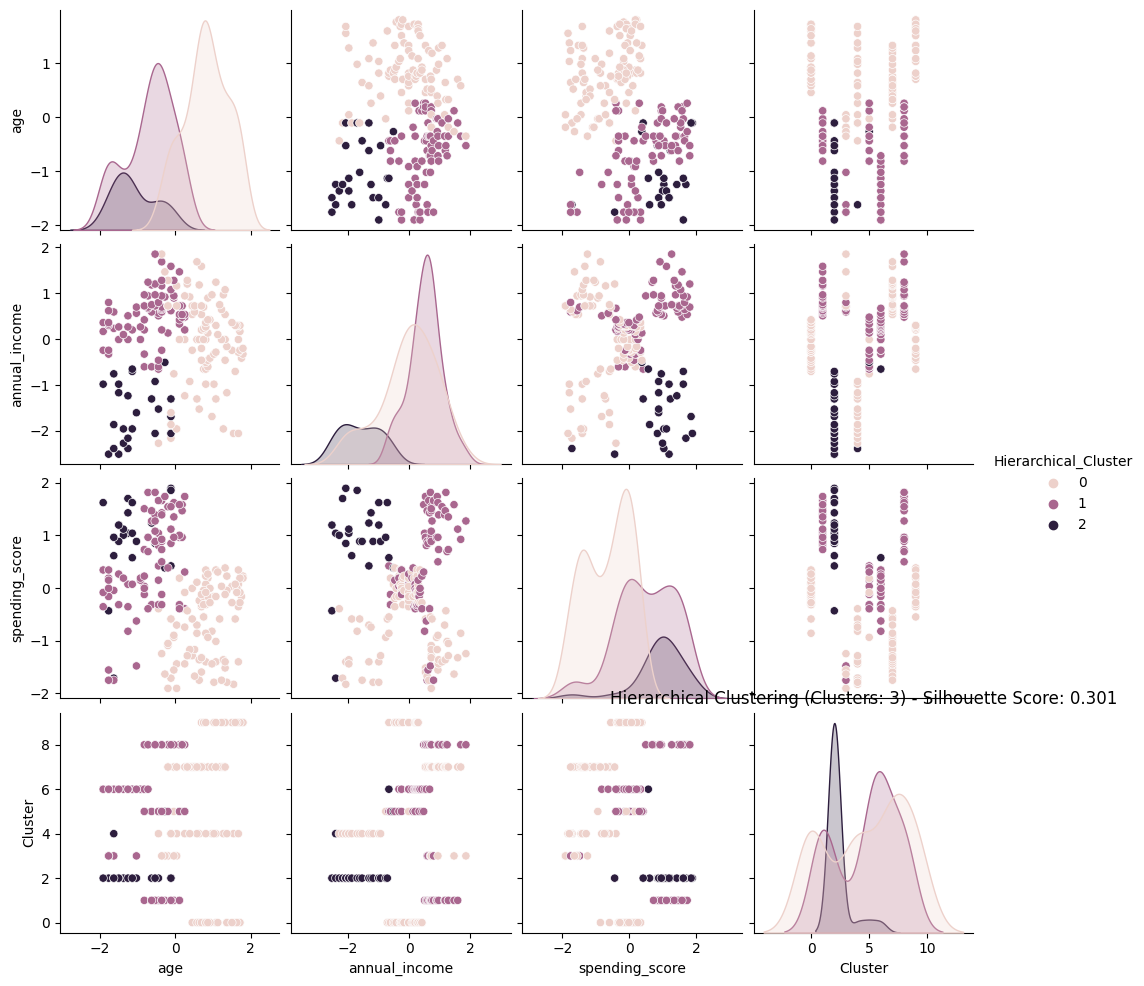

Number of Clusters: 3, Silhouette Score: 0.301


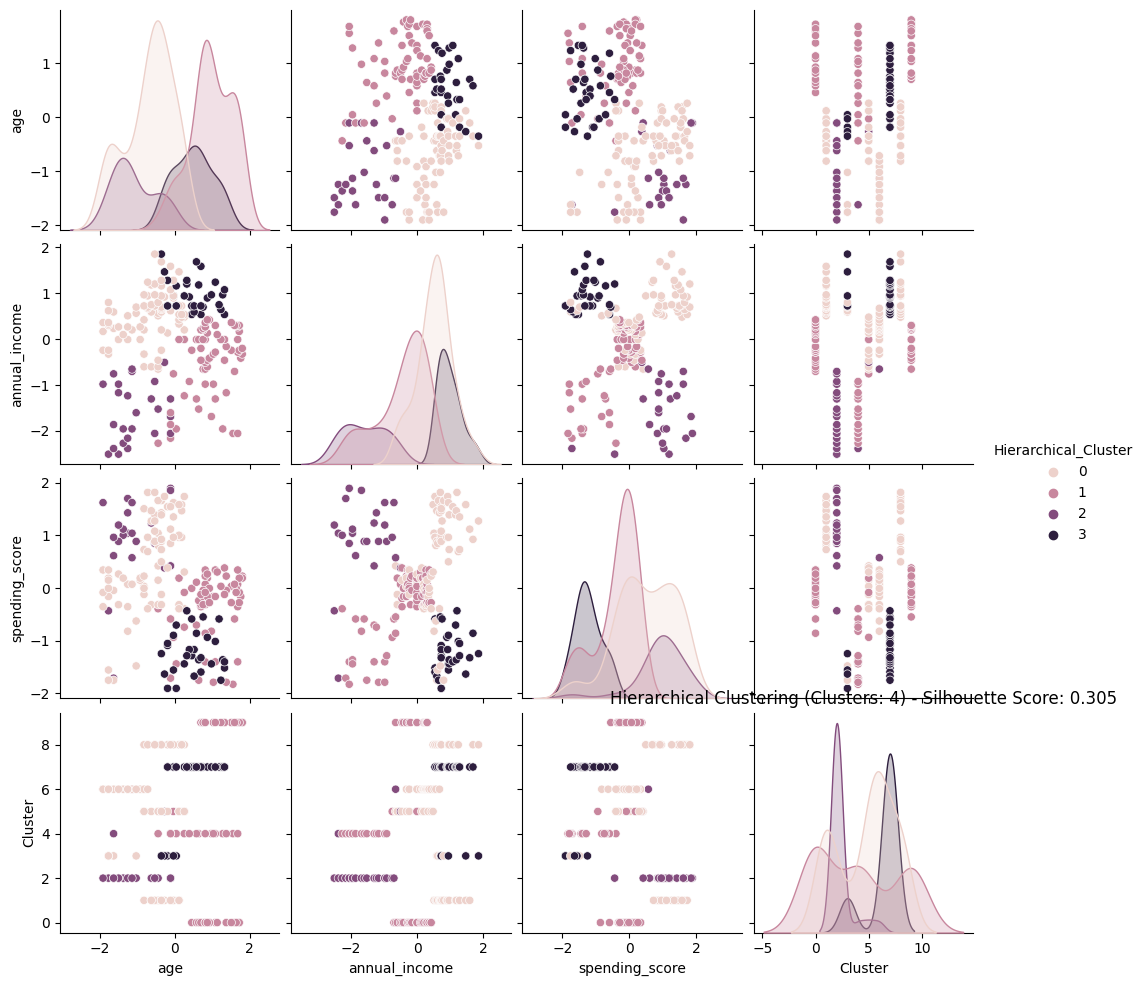

Number of Clusters: 4, Silhouette Score: 0.305


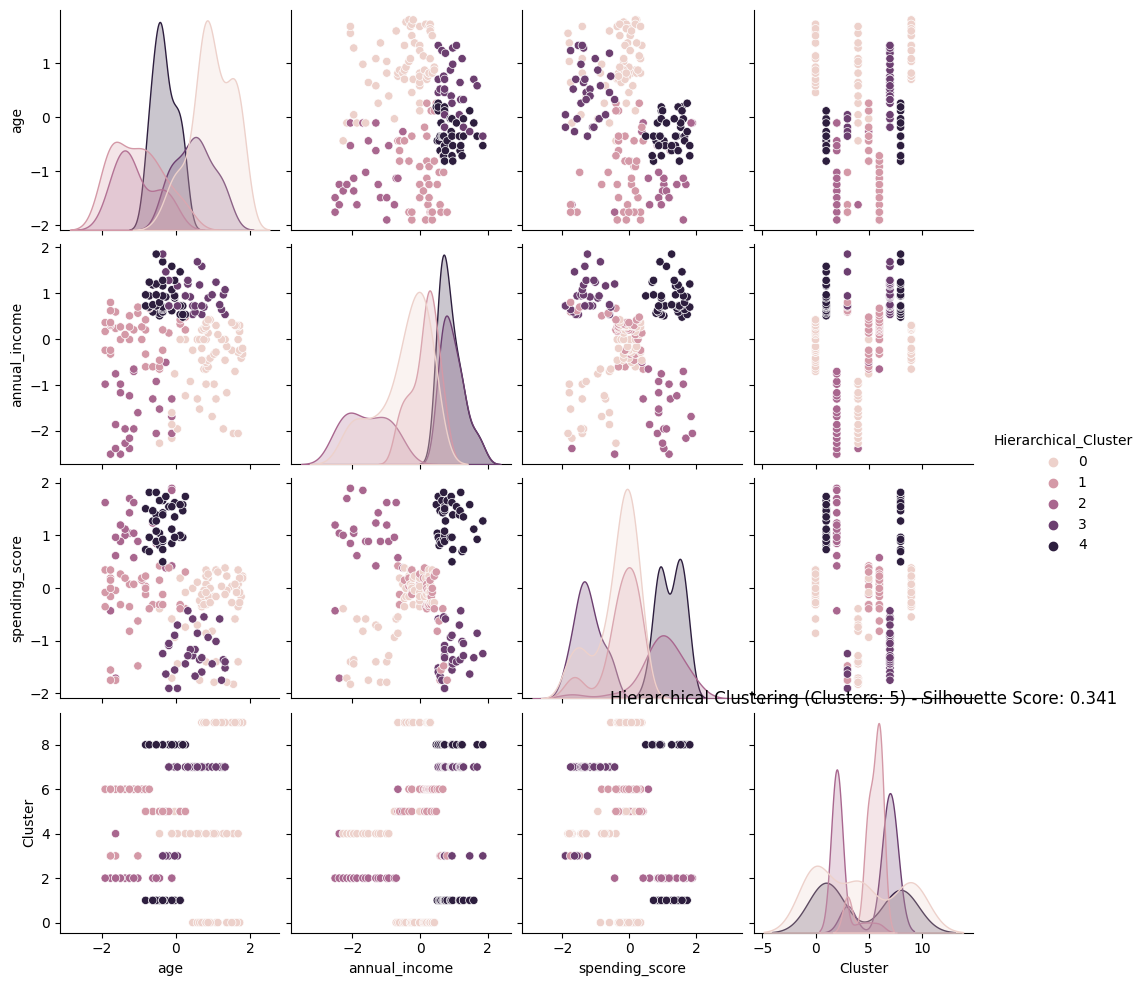

Number of Clusters: 5, Silhouette Score: 0.341


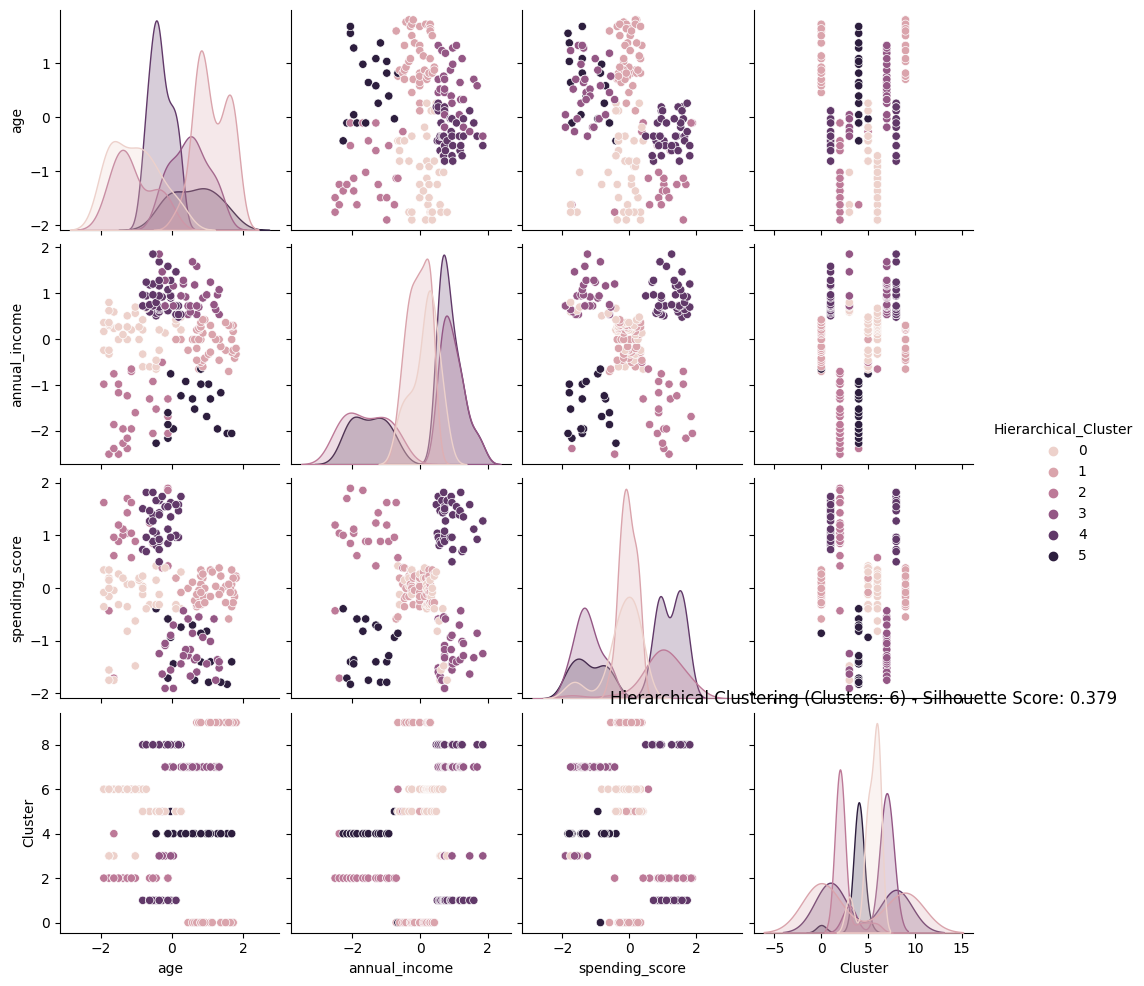

Number of Clusters: 6, Silhouette Score: 0.379


In [51]:
for num_clusters in range(2, 7):
    # Perform hierarchical clustering
    agg_clustering = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')
    df['Hierarchical_Cluster'] = agg_clustering.fit_predict(encoded_df)

    # Silhouette Score for Hierarchical Clustering
    silhouette_avg_hierarchical = silhouette_score(encoded_df, df['Hierarchical_Cluster'])
    
    # Visualizing Clusters (e.g., using Pair Plots)
    sns.pairplot(df, hue='Hierarchical_Cluster')
    plt.title(f'Hierarchical Clustering (Clusters: {num_clusters}) - Silhouette Score: {silhouette_avg_hierarchical:.3f}')
    plt.show()

    # Print Silhouette Score
    print(f'Number of Clusters: {num_clusters}, Silhouette Score: {silhouette_avg_hierarchical:.3f}')

silhouette Score lies bewteen -1 to 1 and our score is 0.379 which is moderate

##  DBSCAN

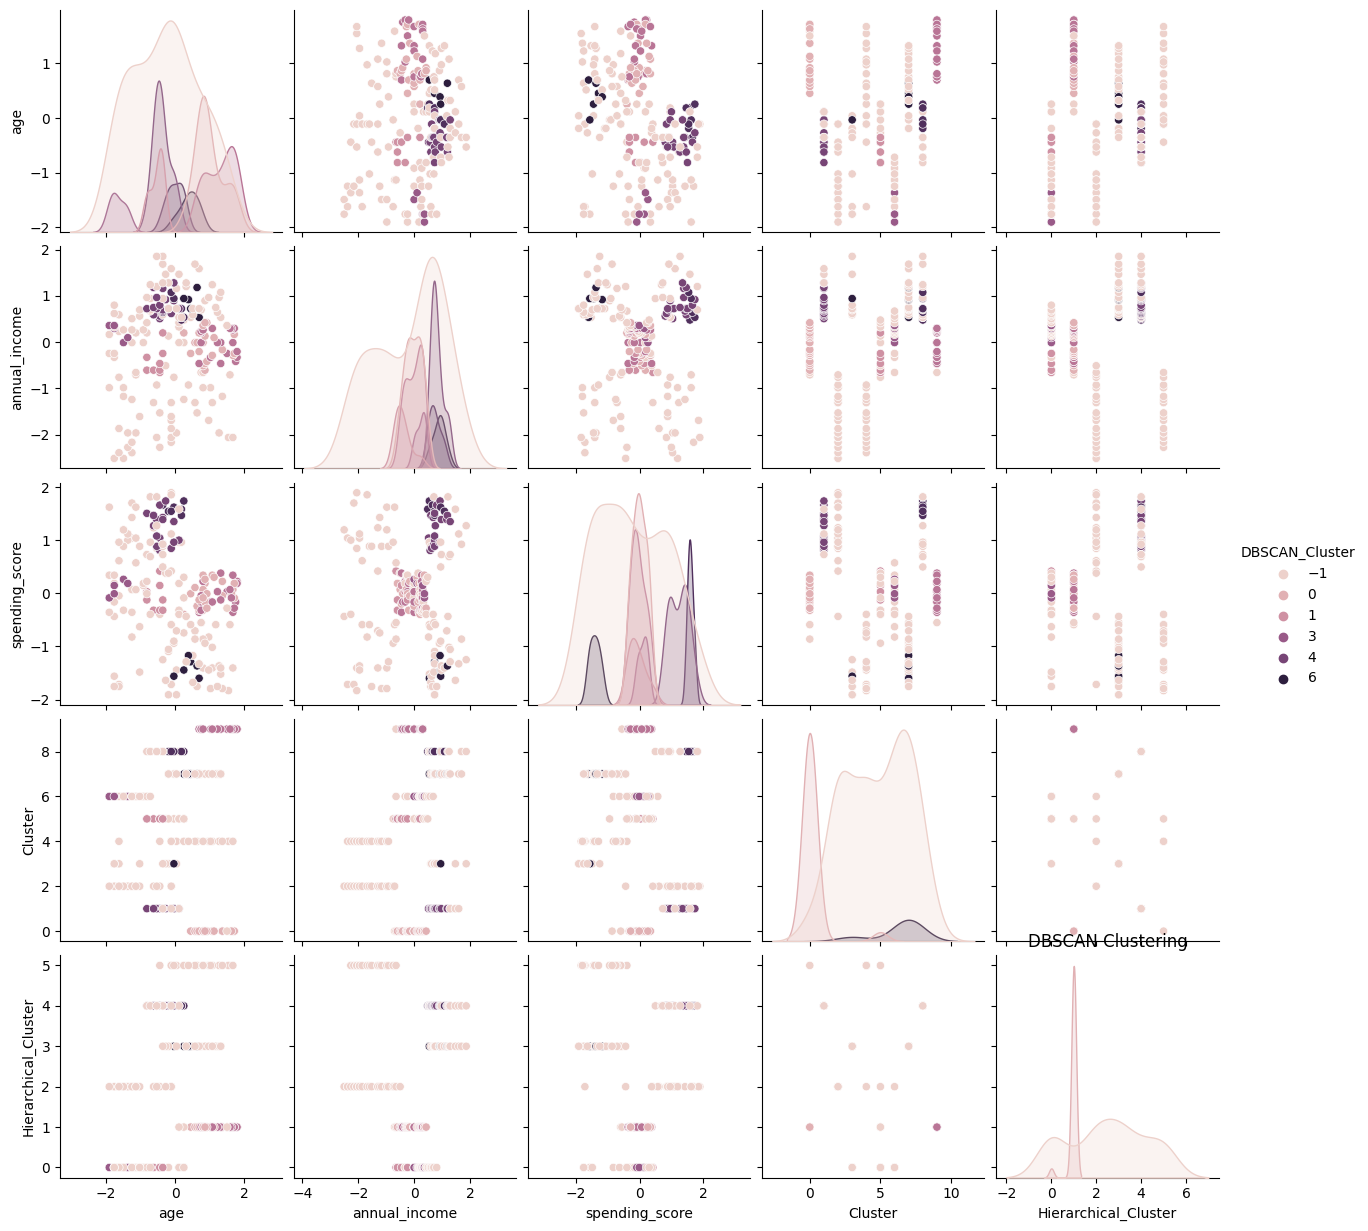

In [53]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(encoded_df)

# Visualizing DBSCAN Clusters (e.g., using Pair Plots)
sns.pairplot(df, hue='DBSCAN_Cluster')
plt.title('DBSCAN Clustering')
plt.show()

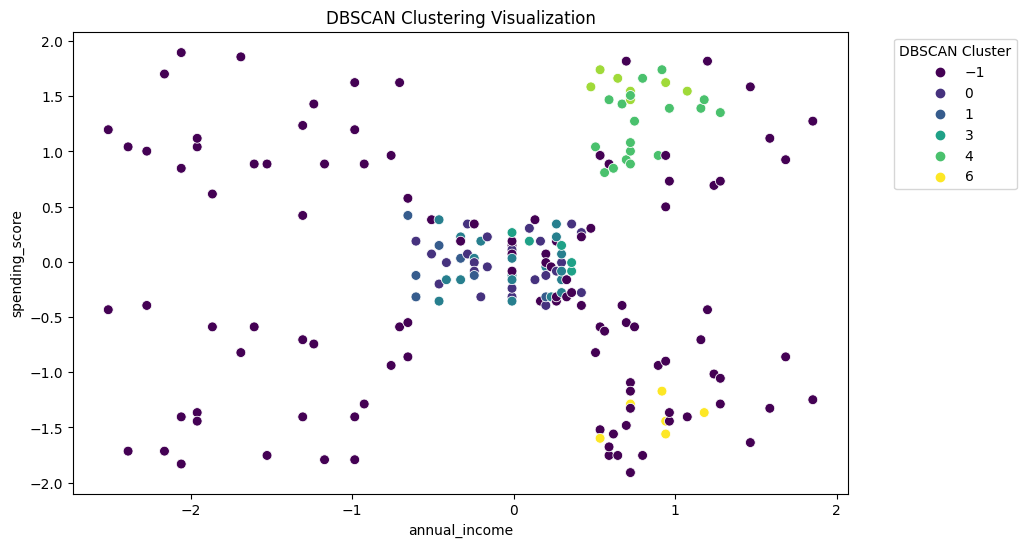

In [56]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='annual_income', y='spending_score', hue='DBSCAN_Cluster', data=df, palette='viridis', s=50)
plt.title('DBSCAN Clustering Visualization')
plt.xlabel('annual_income')
plt.ylabel('spending_score')
plt.legend(title='DBSCAN Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [57]:
df.head()

,gender,age,annual_income,spending_score,Cluster,Hierarchical_Cluster,DBSCAN_Cluster
0,Male,-1.763518,-2.510420,-0.434801,2,2,-1
1,Male,-1.495595,-2.510420,1.195704,2,2,-1
2,Female,-1.626366,-2.387663,-1.715913,4,2,-1
3,Female,-1.251000,-2.387663,1.040418,2,2,-1
4,Female,-0.442306,-2.271926,-0.395980,4,5,-1


"After experimenting with different clustering algorithms, including K-Means, Hierarchical Clustering, and DBSCAN, and considering various evaluation metrics, it is observed that utilizing 6 clusters in our dataset yields the most meaningful and well-defined groupings. The clusters, as identified by the chosen algorithm (e.g., K-Means), exhibit a good balance between cohesion within clusters and separation between them. This choice optimally captures the underlying structure of the data, providing valuable insights into distinct patterns and relationships among data points. The selection of 6 clusters is supported by thorough exploration, visualization, and evaluation, aligning with the inherent characteristics of the dataset."